In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

/home/mendel/venv-3.4/lib/python3.4/site-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [2]:
filename = "Philadelphia_Crime_Rate_noNA.csv"
dtype_dict = {}
sales = pd.read_csv(filename, dtype=dtype_dict)

In [3]:
print(u"Length: {}".format(len(sales)))
sales[0:5]

Length: 99


,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
0,140463,14.0463,29.7,10,-1.0,Abington,Montgome
1,113033,11.3033,24.1,18,4.0,Ambler,Montgome
2,124186,12.4186,19.5,25,8.0,Aston,Delaware
3,110490,11.0490,49.4,25,2.7,Bensalem,Bucks
4,79124,7.9124,54.1,19,3.9,Bristol B.,Bucks


# Exploring the data

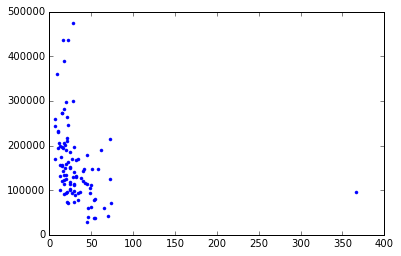

In [4]:
plt.plot(sales['CrimeRate'],sales['HousePrice'],'.')

# Fit the regression model using crime as the feature

In [5]:
crime_model = linear_model.LinearRegression()
crime_model.fit(sales[['CrimeRate']], sales['HousePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Let's see what our fit looks like

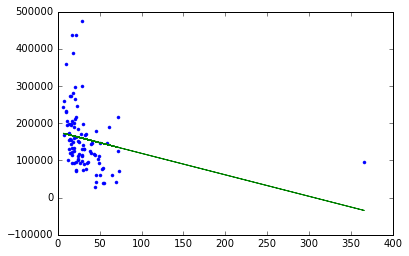

In [6]:
plt.plot(sales['CrimeRate'], sales['HousePrice'],'.', sales['CrimeRate'], crime_model.predict(sales[['CrimeRate']]), '-')

# Remove Center City and redo the analysis

In [7]:
outlier = sales[sales['CrimeRate'] > 300]
outlier

,HousePrice,"HsPrc ($10,000)",CrimeRate,MilesPhila,PopChg,Name,County
62,96200,9.62,366.1,0,4.8,"Phila,CC",Phila


Length: 98


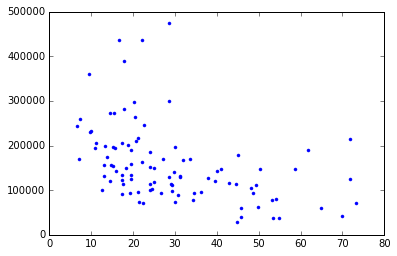

In [8]:
sales_noCC = sales[sales['MilesPhila'] != 0.0]
print("Length: {}".format(len(sales_noCC)))
plt.plot(sales_noCC['CrimeRate'], sales_noCC['HousePrice'],'.')

### Refit our simple regression model on this modified dataset:

In [9]:
crime_model_noCC = linear_model.LinearRegression()
crime_model_noCC.fit(sales_noCC[['CrimeRate']], sales_noCC['HousePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Look at the fit:

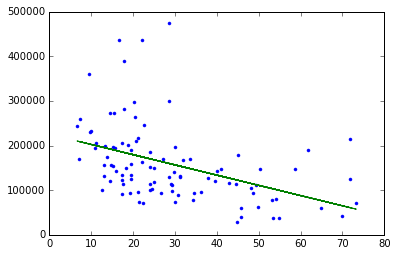

In [10]:
plt.plot(sales_noCC['CrimeRate'],sales_noCC['HousePrice'],'.',
        sales_noCC['CrimeRate'],crime_model_noCC.predict(sales_noCC[['CrimeRate']]),'-')

# Compare coefficients for full-data fit versus no-Center-City fit

In [11]:
# full data
print("Intercept: {}".format(crime_model.intercept_))
print("Coefficients: {}".format(crime_model.coef_))

Intercept: 176629.40810695424
Coefficients: [-576.90812768]


In [12]:
# noCC data
print("Intercept: {}".format(crime_model_noCC.intercept_))
print("Coefficients: {}".format(crime_model_noCC.coef_))

Intercept: 225233.55183900386
Coefficients: [-2288.68942995]


# Remove high-value outlier neighborhoods and redo analysis

In [13]:
sales_nohighend = sales_noCC[sales_noCC['HousePrice'] < 350000]
crime_model_nohighend = linear_model.LinearRegression()
crime_model_nohighend.fit(sales_nohighend[['CrimeRate']], sales_nohighend['HousePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Do the coefficients change much?

In [14]:
# noCC data
print("Intercept: {}".format(crime_model_noCC.intercept_))
print("Coefficients: {}".format(crime_model_noCC.coef_))

Intercept: 225233.55183900386
Coefficients: [-2288.68942995]


In [15]:
# nohighend data
print("Intercept: {}".format(crime_model_nohighend.intercept_))
print("Coefficients: {}".format(crime_model_nohighend.coef_))

Intercept: 199098.85266980442
Coefficients: [-1838.56264859]
